<a href="https://colab.research.google.com/github/jese182/deeplearning_project/blob/main/object_detection/paper_to_latex_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 45.8 MB/s eta 0:00:00


In [ ]:
!pip install pix2tex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.0/427.0 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 31.2 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.12
    Uninstalling timm-1.0.12:
      Successfully uninstalled timm-1.0.12


#추론, 결과시각화


0: 1024x768 14 equations, 8.2ms
Speed: 2.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 768)


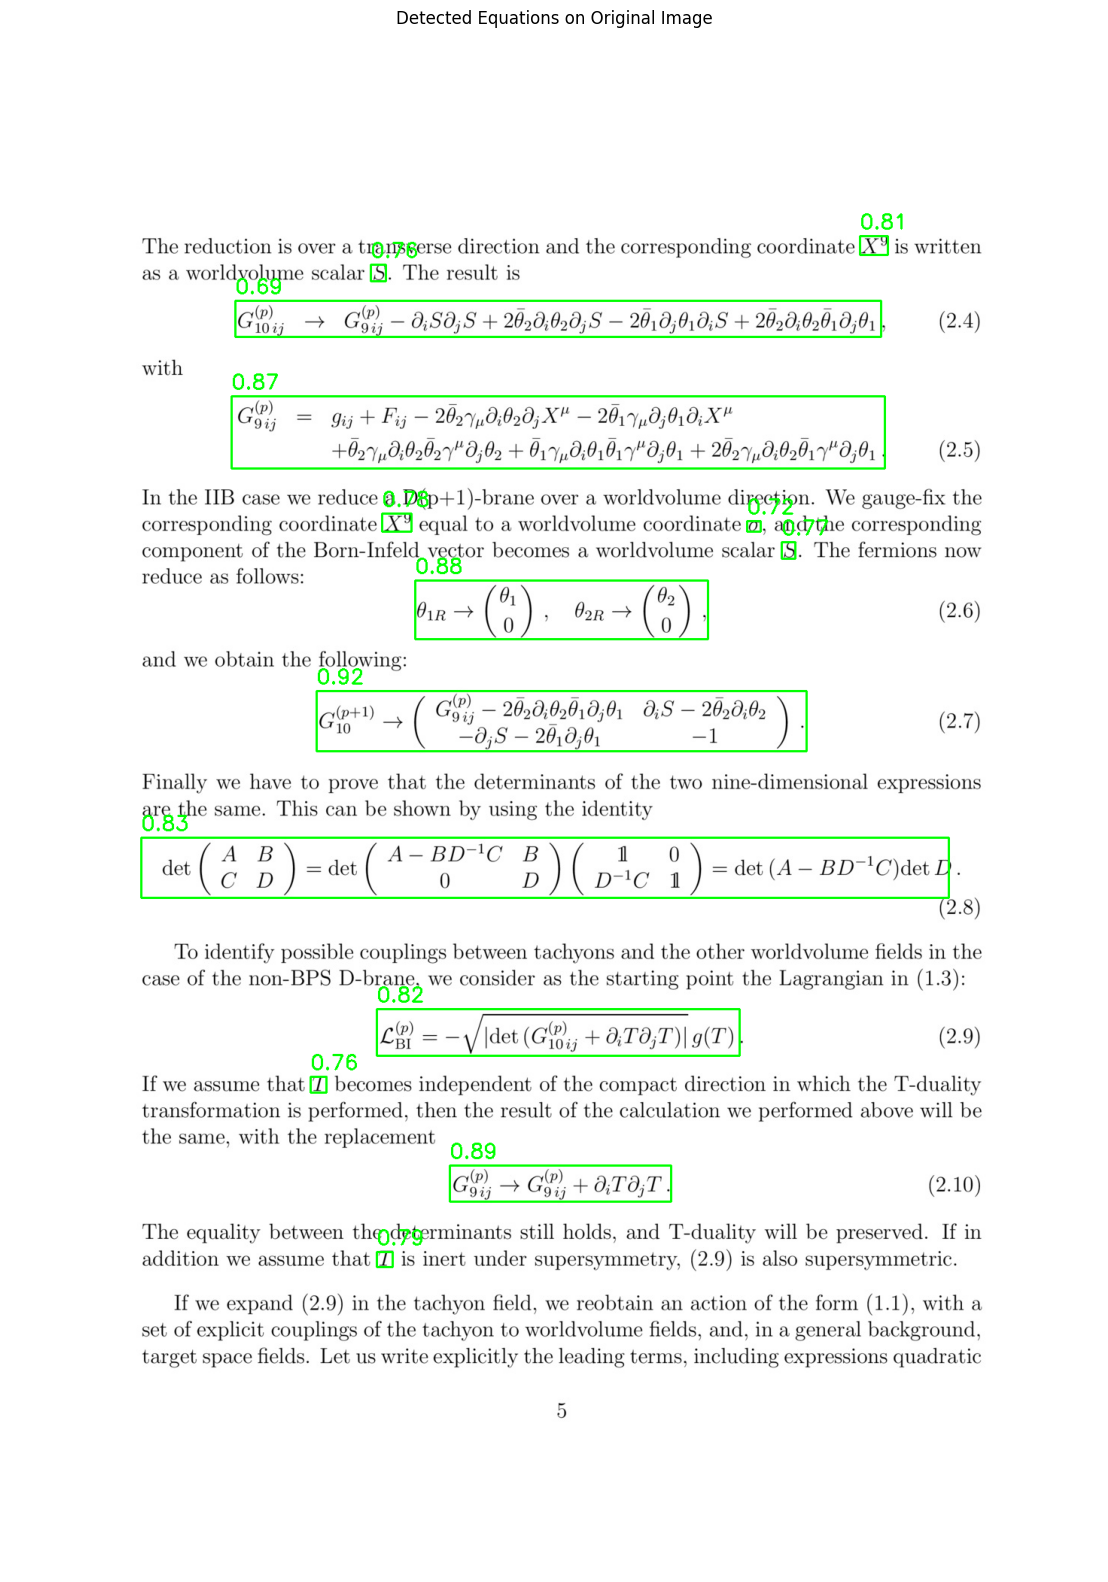


Equation 1:
--------------------------------------------------


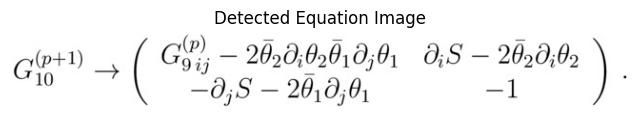

LaTeX code:
G_{10}^{(p+1)}\rightarrow\left(\begin{array}{c c}{{G_{9\,i j}^{(p)}-2\bar{\theta}_{2}\partial_{i}\theta_{1}\partial_{j}\theta_{1}}}&{{\partial_{i}S-2\bar{\theta}_{2}\partial_{i}\theta_{2}}}\\ {{-\partial_{j}S-2\bar{\theta}_{1}\partial_{j}\theta_{1}}}&{{-1}}\end{array}\right)\,.

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 2:
--------------------------------------------------


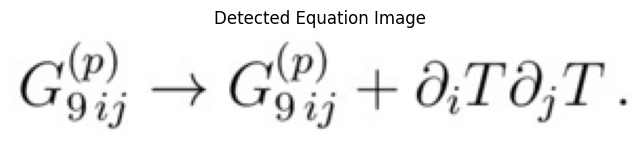

LaTeX code:
G_{9\,i j}^{(p)}\to G_{9\,i j}^{(p)}+\partial_{i}T^{*}\!\partial_{j}T\,.

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 3:
--------------------------------------------------


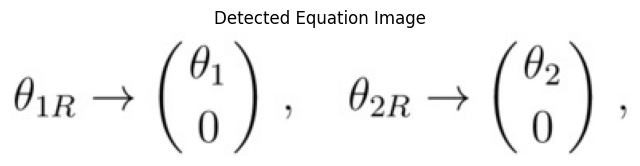

LaTeX code:
\theta_{1R}\to\left(\stackrel{\theta_{1}}{0}\right)\,,\quad\theta_{2R}\to\left(\stackrel{\theta_{2}}{0}\right)\,,

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 4:
--------------------------------------------------


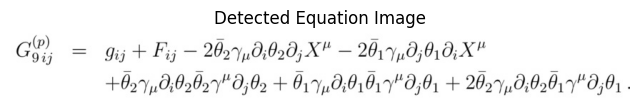

LaTeX code:
\begin{array}{r c l}{{G_{9\,i j}^{(p)}}}&{{=}}&{{g_{i j}+F_{i j}-2\bar{\theta}_{2}\gamma_{\mu}\partial_{i}\theta_{2}\partial_{j}X^{\mu}-2\bar{\theta}_{1}\gamma_{\mu}\partial_{j}\theta_{1}\partial_{i}X^{\mu}}}\\ {{}}&{{}}&{{+\bar{\theta}_{2}\gamma_{\mu}\partial_{i}\theta_{2}\bar{\theta}_{2}\gamma^{\mu}\partial_{j}\theta_{2}+\bar{\theta}_{1}\gamma_{\mu}\partial_{i}\theta_{1}\gamma^{\mu}\partial_{j}\theta_{1}+2\bar{\theta}_{2}\gamma_{\mu}\partial_{i}\theta_{2}\bar{\theta}_{1}\gamma^{\mu}\partial_{j}\theta_{1}+\bar{\theta}_{2}\gamma^{\mu}\partial_{j}\theta_{1}.}}\end{array}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 5:
--------------------------------------------------


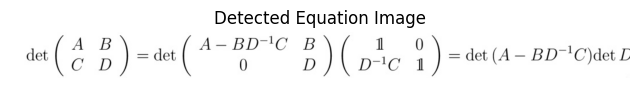

LaTeX code:
\operatorname*{det}{\left(\begin{array}{l l}{A}&{B}\\ {C}&{D}\end{array}\right)}=\operatorname*{det}{\left(\begin{array}{l l}{A-B D^{-1}C}&{B}\\ {0}&{D}\end{array}\right)}\left({\begin{array}{l l}{{\parallel}}&{0}\\ {D^{-1}C}&{\parallel}\end{array}}\right)}=\operatorname*{det}\left(A-B D^{-1}C\right)\operatorname*{det}L.

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 6:
--------------------------------------------------


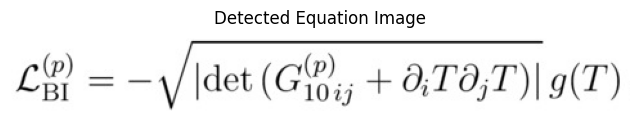

LaTeX code:
\mathcal{L}_{\mathrm{BI}}^{(p)}=-\sqrt{|\mathrm{det}\left(G_{10\,i j}^{(p)}+\partial_{i}T\partial_{j}T\right)}|\,g(T)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 7:
--------------------------------------------------


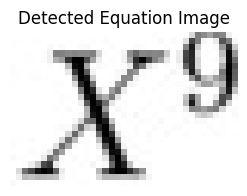

LaTeX code:
X^{\vee}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 8:
--------------------------------------------------


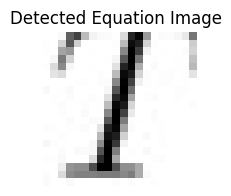

LaTeX code:
{\boldsymbol{\mathit{I}}}^{\ast}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 9:
--------------------------------------------------


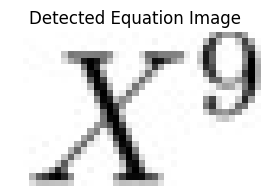

LaTeX code:
X^{\vee}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 10:
--------------------------------------------------


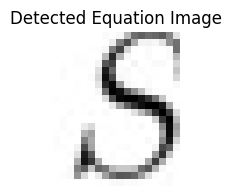

LaTeX code:
\mathsf{S}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 11:
--------------------------------------------------


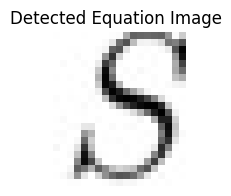

LaTeX code:
\ {\boldsymbol{S}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 12:
--------------------------------------------------


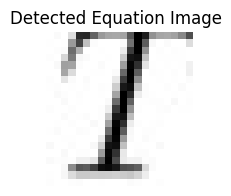

LaTeX code:
\boldsymbol{\mathit{I}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 13:
--------------------------------------------------


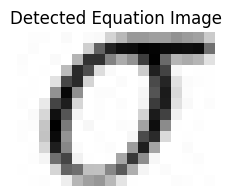

LaTeX code:
{\mathcal{O}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 14:
--------------------------------------------------


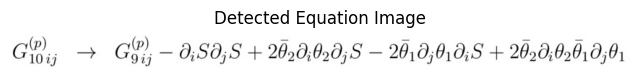

LaTeX code:
G_{10\,i j}^{(p)}\ \ \to\ \ G_{9i j}^{(p)}-\partial_{i}S\partial_{j}S+2\theta_{2}\partial_{i}\theta_{2}\partial_{j}S-2\theta_{1}\partial_{j}\theta_{1}\partial_{i}S+2\theta_{2}\partial_{i}\theta_{2}\theta_{1}\partial_{j}\theta_{1}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------


In [ ]:
from ultralytics import YOLO
from pix2tex.cli import LatexOCR
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, Math
import random
import os

def preprocess_image(image):
    # 1. 흑백으로 변환
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # 2. 여백 제거
    thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV)[1]
    coords = cv2.findNonZero(thresh)

    # 좌표를 기준으로 가장 작은 바운딩 박스계산.
    x, y, w, h = cv2.boundingRect(coords)

    # 원본 이미지에서 계산된 바운딩 박스 영역만 크롭하여 여백 제거.
    cropped_image = image[y:y+h, x:x+w]

    # 3. 리사이징 (768x1024로 변경)
    resized_image = cv2.resize(cropped_image, (768, 1024))

    # 4. 3채널 확인 및 변환 (yolo 입력)
    if len(resized_image.shape) == 2:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2BGR)


    return resized_image, (x, y, w, h)

def convert_coordinates(box, crop_info, original_size, target_size=(768, 1024)):

    # x, y: 여백이 제거된 이미지의 시작 좌표 (원본 이미지 기준).
    # crop_w, crop_h: 여백이 제거된 이미지의 너비와 높이 (원본 이미지 기준).
    x, y, crop_w, crop_h = crop_info

    # orig_h, orig_w = original_size
    target_w, target_h = target_size

    # 1. 768x1024에서 crop된 이미지 크기로 변환
    x1, y1, x2, y2 = box
    x1 = (x1 * crop_w) / target_w
    x2 = (x2 * crop_w) / target_w
    y1 = (y1 * crop_h) / target_h
    y2 = (y2 * crop_h) / target_h

    # 2. 여백을 고려하여 원본 이미지 좌표로 변환
    x1 = x1 + x
    x2 = x2 + x
    y1 = y1 + y
    y2 = y2 + y

    return list(map(int, [x1, y1, x2, y2]))

def detect_and_ocr_equations(image_path):
    # 모델 로드
    yolo_model = YOLO('best.pt')
    ocr_model = LatexOCR()

    # 이미지 읽기
    original_image = cv2.imread(image_path)
    original_size = original_image.shape[:2]  # (height, width)

    # 전처리
    processed_image, crop_info = preprocess_image(original_image)

    # YOLO로 수식 탐지
    results = yolo_model.predict(processed_image)

    equations = []
    for r in results[0].boxes.data:
        x1, y1, x2, y2, conf, cls = r
        if conf > 0.5:  # confidence threshold
            # 원본 이미지 좌표로 변환
            orig_coords = convert_coordinates(
                [x1, y1, x2, y2],
                crop_info,
                original_size
            )
            x1, y1, x2, y2 = orig_coords

            # 원본 이미지에서 수식 부분 추출
            equation_image = original_image[y1:y2, x1:x2]

            # numpy array를 PIL Image로 변환
            pil_image = Image.fromarray(cv2.cvtColor(equation_image, cv2.COLOR_BGR2RGB))

            # OCR로 LaTeX 변환
            latex = ocr_model(pil_image)
            equations.append({
                'bbox': [x1, y1, x2, y2],
                'confidence': conf,
                'latex': latex
            })

    return equations, original_image


def visualize_original_detections(original_image, equations):
    # 시각화를 위한 이미지 복사
    visualization_image = original_image.copy()

    # 각 탐지된 수식에 대해 바운딩 박스 그리기
    for eq in equations:
        x1, y1, x2, y2 = eq['bbox']
        # 녹색 바운딩 박스 그리기 (BGR 형식)
        cv2.rectangle(visualization_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # confidence 값 표시
        conf_text = f"{eq['confidence']:.2f}"
        cv2.putText(visualization_image, conf_text, (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # 결과 시각화
    plt.figure(figsize=(20, 20))
    plt.imshow(cv2.cvtColor(visualization_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected Equations on Original Image')
    plt.show()


def visualize_all_equations(equations, original_image):
    # 모든 탐지된 수식에 대해
    for i, eq in enumerate(equations):
        print(f"\nEquation {i+1}:")
        print("-" * 50)

        # 바운딩 박스에서 수식 이미지 추출
        x1, y1, x2, y2 = eq['bbox']
        equation_image = original_image[y1:y2, x1:x2]

        # 원본 수식 이미지 표시
        plt.figure(figsize=(8, 2))
        plt.imshow(cv2.cvtColor(equation_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Detected Equation Image')
        plt.show()

        # LaTeX 문자열 출력
        print("LaTeX code:")
        print(eq['latex'])

        # 렌더링된 수식 표시
        print("\nRendered equation:")
        display(Math(eq['latex']))
        print("-" * 50)

#실행 예시
if __name__ == "__main__":
    image_path = '/content/0003221-page05.jpg'
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # 수식 탐지 및 OCR 수행
    equations, original_image = detect_and_ocr_equations(image_path)

    # 원본 이미지에서의 탐지 결과 시각화
    visualize_original_detections(original_image, equations)

    # 모든 수식의 상세 결과 시각화
    visualize_all_equations(equations, original_image)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


download weights v0.0.1 to path /usr/local/lib/python3.10/dist-packages/pix2tex/model/checkpoints


weights.pth: 100%|██████████| 97.4M/97.4M [00:02<00:00, 41.2Mb/s]
image_resizer.pth: 100%|██████████| 18.5M/18.5M [00:00<00:00, 65.8Mb/s]



0: 1024x768 45 equations, 63.2ms
Speed: 7.3ms preprocess, 63.2ms inference, 766.6ms postprocess per image at shape (1, 3, 1024, 768)


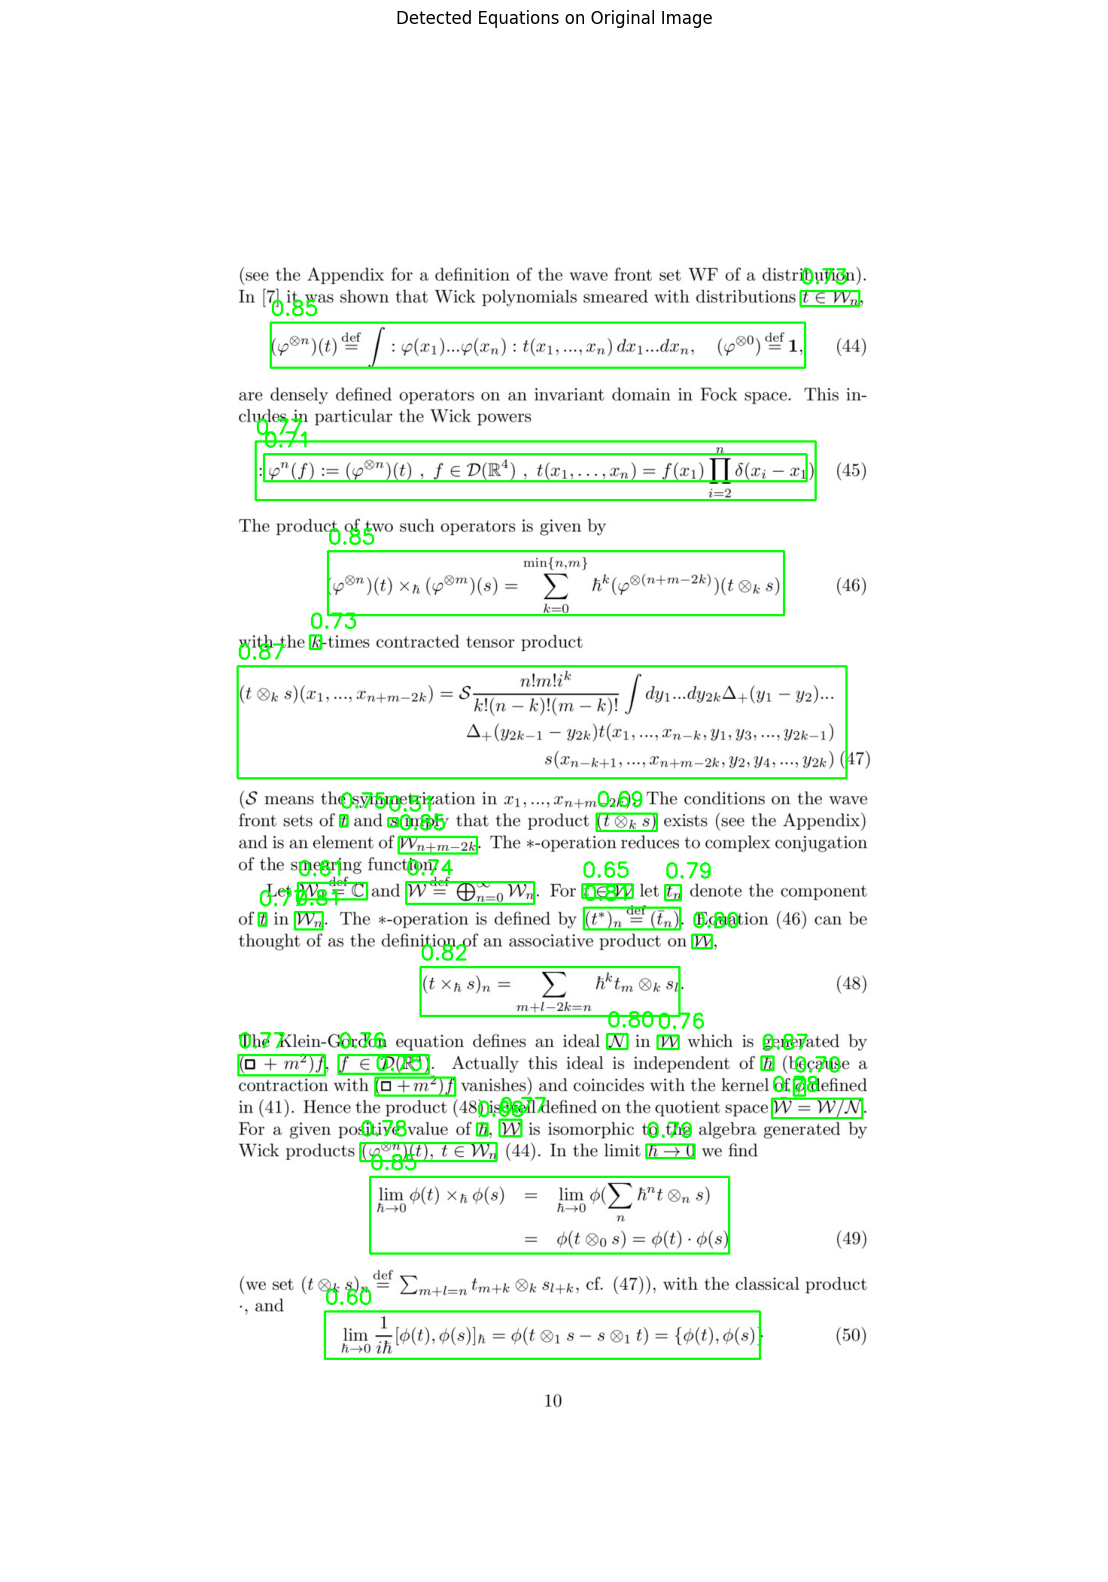


Equation 1:
--------------------------------------------------


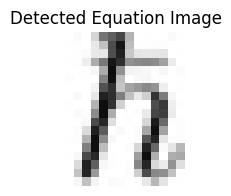

LaTeX code:
\hbar

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 2:
--------------------------------------------------


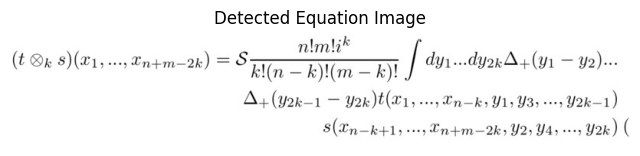

LaTeX code:
(t\otimes_{k}s)(x_{1},...,x_{n+m-2k})=S{\frac{n!m!t^{k}}{k!(n-k)!(m-k)!}}\int d y_{1}...d y_{2k}\Delta_{+}(y_{1}-y_{2})...\quad

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 3:
--------------------------------------------------


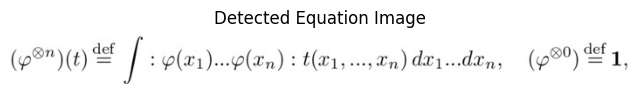

LaTeX code:
(\varphi^{\otimes n})(t)\ {\stackrel{\mathrm{def}}{=}}\ \int:\varphi(x_{1})...\varphi(x_{n}):t(x_{1},...,x_{n})\,d x_{1}...d x_{n},\quad(\varphi^{\otimes0})\ {\stackrel{\mathrm{def}}{=}}\,{\bf1},

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 4:
--------------------------------------------------


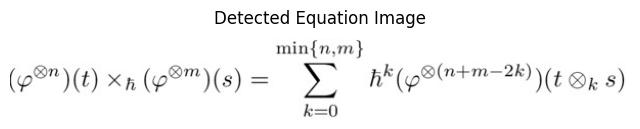

LaTeX code:
(\varphi^{\otimes n})(t)\times_{\hbar}(\varphi^{\otimes m})(s)=\sum_{k=0}^{\operatorname*{min}\{n,m\}}\hbar^{k}(\varphi^{\otimes(n+m-2k))}(t\otimes_{k}s)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 5:
--------------------------------------------------


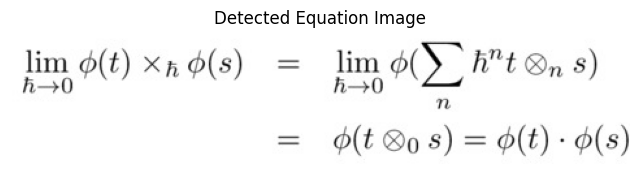

LaTeX code:
\begin{array}{r c l}{{\operatorname*{lim}_{}\phi(t)\times\hbar\phi(s)}}&{{=}}&{{\operatorname*{lim}_{n\rightarrow0}\phi(\sum_{n}\hbar^{n}t\otimes_{n}s)}}\\ {{}}&{{}}&{{}}\\ {{}}&{{=}}&{{\phi(t\otimes_{0}s)=\phi(t)\cdot\phi(s)}}\end{array}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 6:
--------------------------------------------------


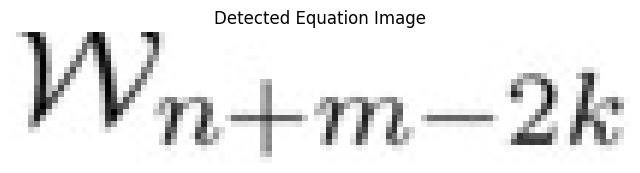

LaTeX code:
\textstyle W_{n+m-2k}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 7:
--------------------------------------------------


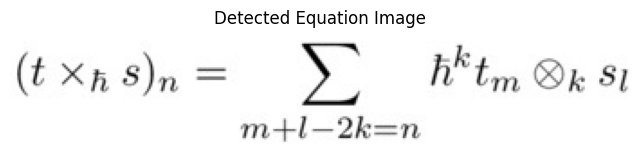

LaTeX code:
(t\times_{\hbar}s)_{n}\stackrel{_{\textstyle=}}{=}\sum_{m+1-2k=n}\hbar^{k}t_{m}\otimes_{k}s_{l}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 8:
--------------------------------------------------


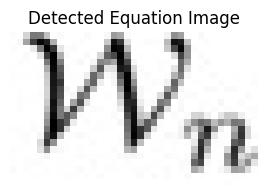

LaTeX code:
\textstyle{\mathcal{N}}_{n}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 9:
--------------------------------------------------


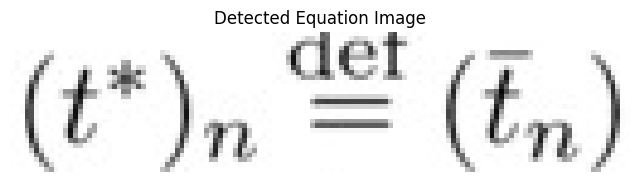

LaTeX code:
\left({\cal F}^{\star}\right)_{n}\ \stackrel{\mathrm{def}}{\longrightarrow}\ \left(\overline{{{\cal F}}}_{n}\right)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 10:
--------------------------------------------------


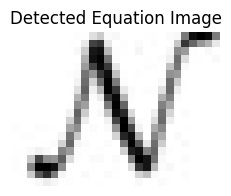

LaTeX code:
{\mathcal{N}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 11:
--------------------------------------------------


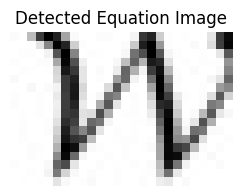

LaTeX code:
{\mathcal{N}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 12:
--------------------------------------------------


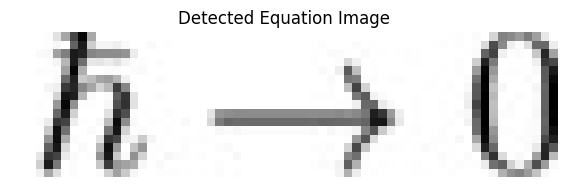

LaTeX code:
\hbar\to0

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 13:
--------------------------------------------------


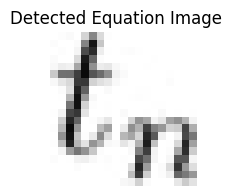

LaTeX code:
{\mathbf{}}t_{n}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 14:
--------------------------------------------------


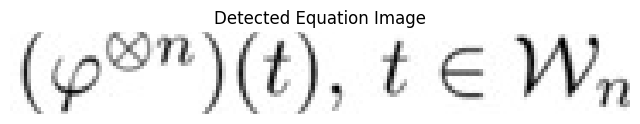

LaTeX code:
(\varphi^{\otimes n})(t),\,\,t\in\mathcal{V}_{n}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 15:
--------------------------------------------------


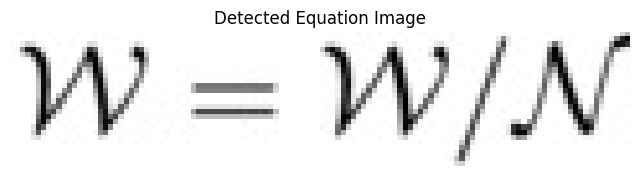

LaTeX code:
\mathcal{N}=\mathcal{N}/\mathcal{N}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 16:
--------------------------------------------------


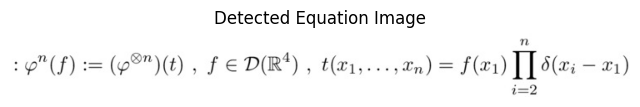

LaTeX code:
:{\varphi^{n}}(f):=(\varphi^{\otimes n})(t)~,~f\in{\mathcal{D}}(\mathbb{R}^{4})~,~t(x_{1},\ldots,x_{n})=f(x_{1})\prod_{i=2}^{n}\delta(x_{i}-x_{1})

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 17:
--------------------------------------------------


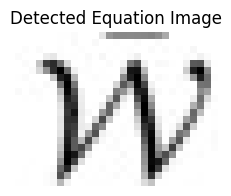

LaTeX code:
{\mathcal{N}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 18:
--------------------------------------------------


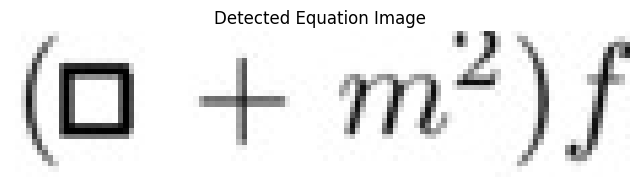

LaTeX code:
(\mathbf{D\}+\ m^{2})f

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 19:
--------------------------------------------------


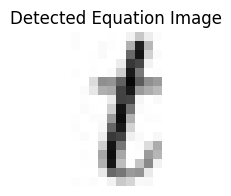

LaTeX code:
\boldsymbol{\mathit{l}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 20:
--------------------------------------------------


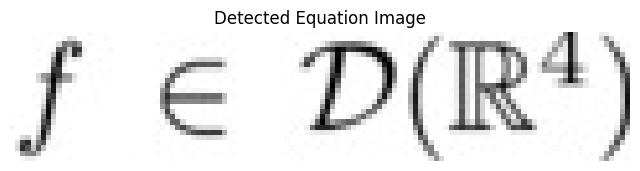

LaTeX code:
f\ \in\ D(\mathbb{R}^{4})

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 21:
--------------------------------------------------


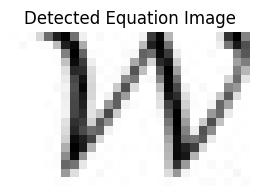

LaTeX code:
{\mathcal{N}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 22:
--------------------------------------------------


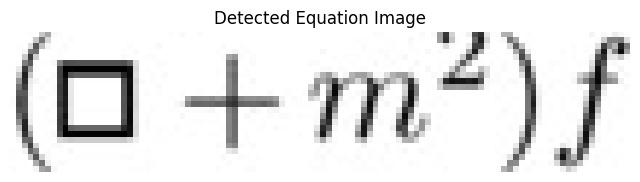

LaTeX code:
(\Omega+m^{2})f

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 23:
--------------------------------------------------


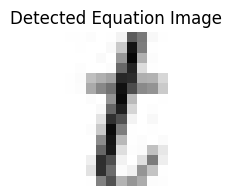

LaTeX code:
{\mathbf{}}t

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 24:
--------------------------------------------------


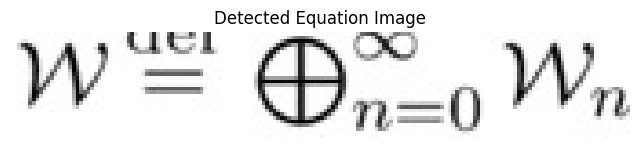

LaTeX code:
\mathcal{W}\stackrel{\mathrm{act}}{=}\bigoplus_{n=0}^{\infty}\mathcal{W}_{n}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 25:
--------------------------------------------------


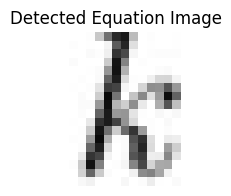

LaTeX code:
\textstyle\bigwedge_{U}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 26:
--------------------------------------------------


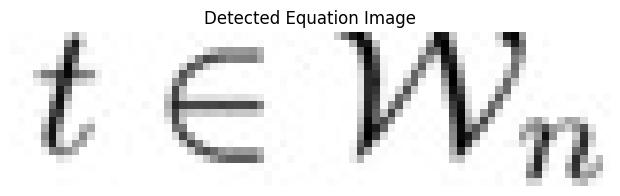

LaTeX code:
t\in{\mathcal{W}}_{n}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 27:
--------------------------------------------------


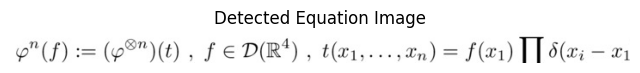

LaTeX code:
\varphi^{n}(f):=(\varphi^{\otimes n})(t)\;,\;f\in{\mathcal{D}}(\mathbb{R}^{4})\;,\;t(x_{1},\ldots,x_{n})=f(x_{1})\prod\delta(x_{i}-x_{1})

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 28:
--------------------------------------------------


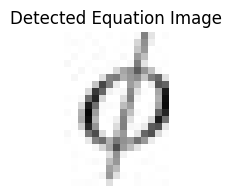

LaTeX code:
\partial\!\!\!/

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 29:
--------------------------------------------------


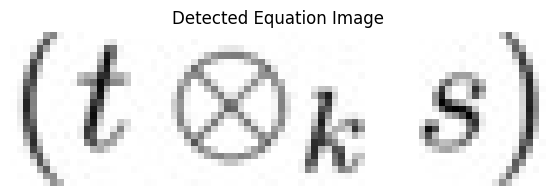

LaTeX code:
(t\otimes_{k}s)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 30:
--------------------------------------------------


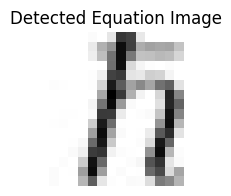

LaTeX code:
\hbar

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 31:
--------------------------------------------------


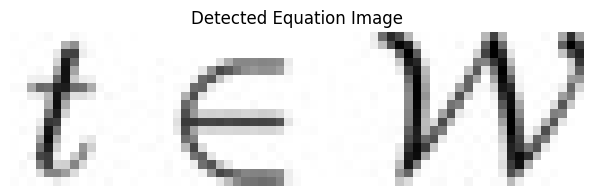

LaTeX code:
t\in{\mathcal{N}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 32:
--------------------------------------------------


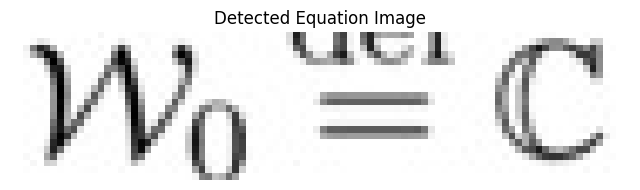

LaTeX code:
\mathcal{W}_{0}\stackrel{\cong}{=}\mathbb{C}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 33:
--------------------------------------------------


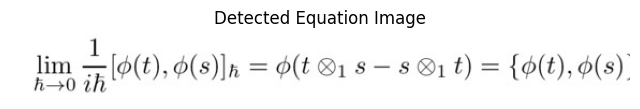

LaTeX code:
\operatorname*{lim}_{\hbar\rightarrow0}\frac{1}{i\hbar}[\phi(t),\phi(s)]_{\hbar}=\phi(t\otimes_{1}s-s\otimes_{1}t)=\{\phi(t),\phi(s).

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 34:
--------------------------------------------------


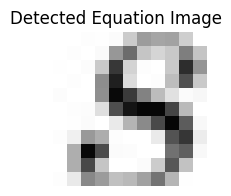

LaTeX code:
\boldsymbol{\mathsf{S}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------


In [ ]:

if __name__ == "__main__":
    image_path = '/content/0001129-page10.jpg'
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # 수식 탐지 및 OCR 수행
    equations, original_image = detect_and_ocr_equations(image_path)

    # 원본 이미지에서의 탐지 결과 시각화
    visualize_original_detections(original_image, equations)

    # 모든 수식의 상세 결과 시각화
    visualize_all_equations(equations, original_image)


0: 1024x768 46 equations, 9.0ms
Speed: 2.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 768)


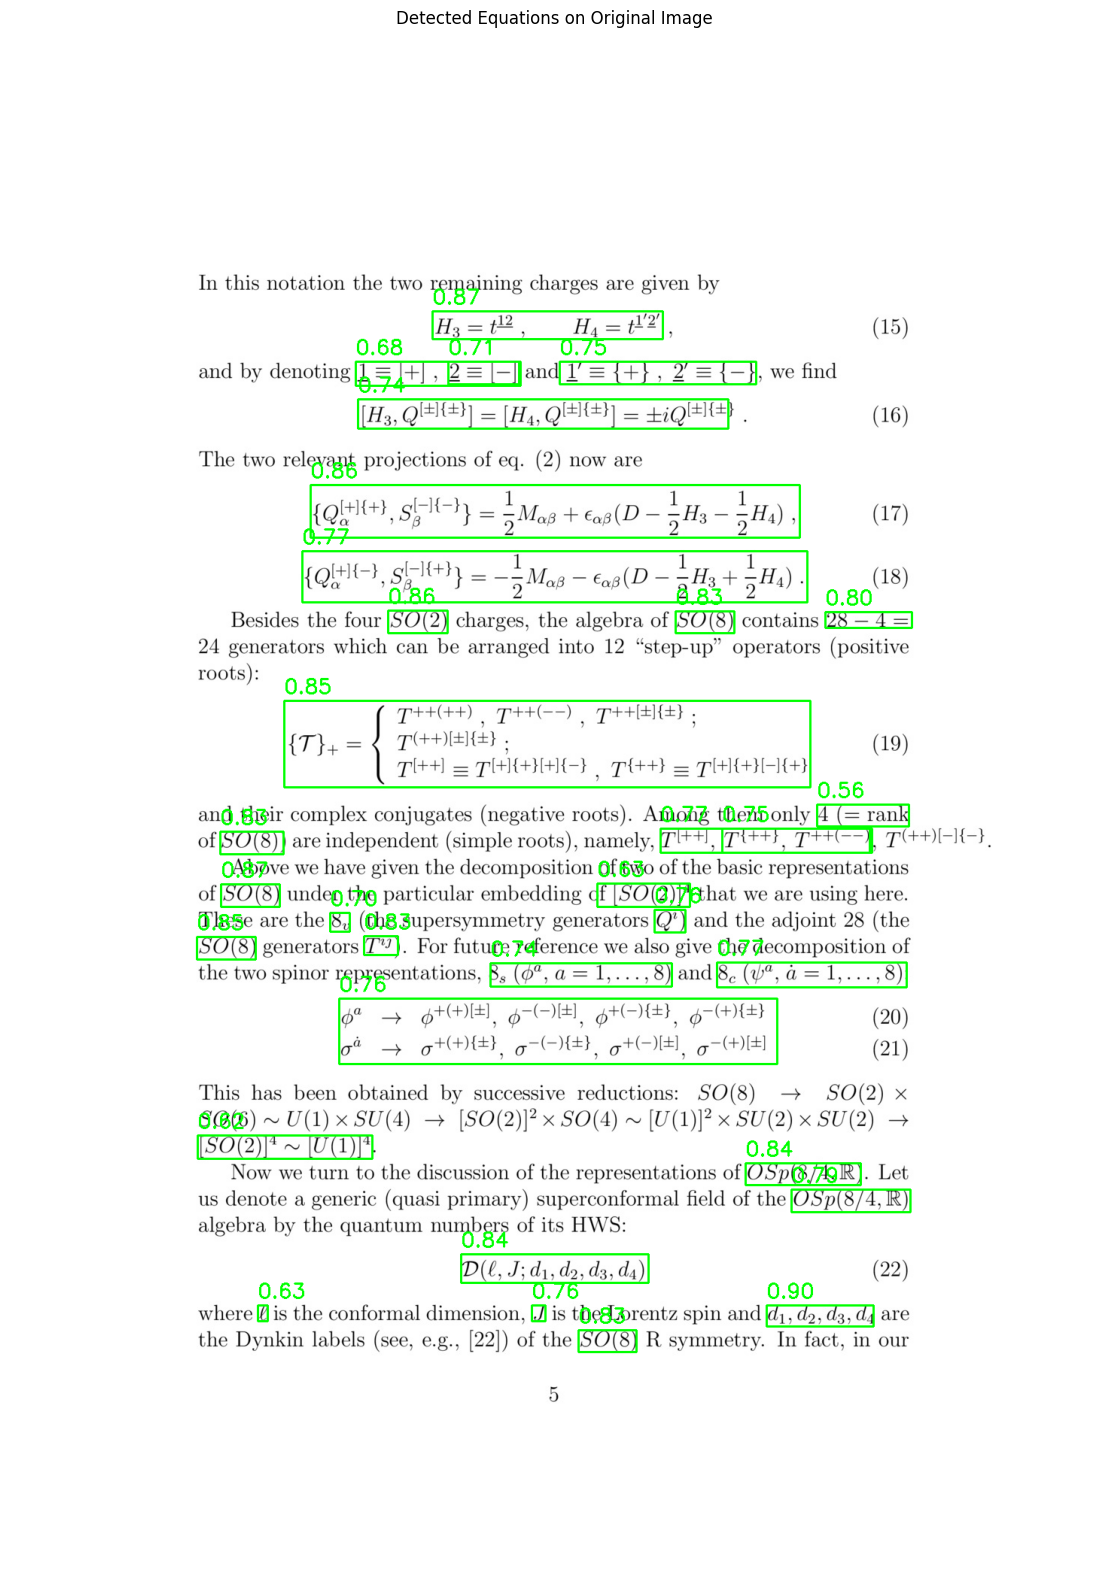


Equation 1:
--------------------------------------------------


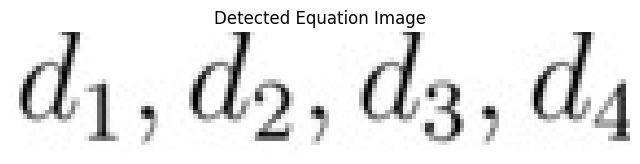

LaTeX code:
d_{1},d_{2},d_{3},d_{4}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 2:
--------------------------------------------------


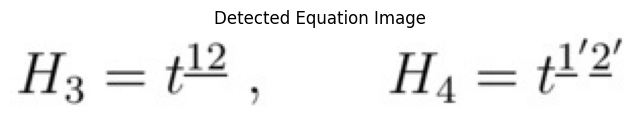

LaTeX code:
H_{3}=t^{12}\;,\qquad H_{4}=t^{1^{\prime}2^{\prime}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 3:
--------------------------------------------------


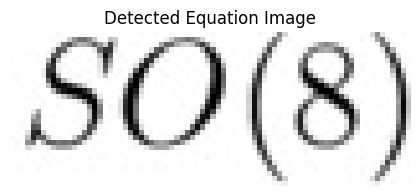

LaTeX code:
S O(8)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 4:
--------------------------------------------------


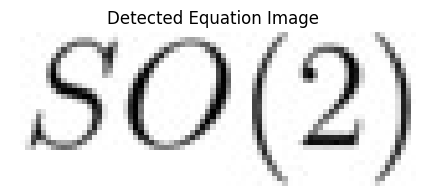

LaTeX code:
S O(2)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 5:
--------------------------------------------------


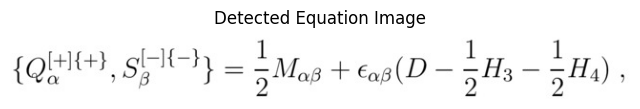

LaTeX code:
\{Q_{\alpha}^{[+]\{+\}},S_{\beta}^{[-]\{-\}}\}=\frac{1}{2}M_{\alpha\beta}+\epsilon_{\alpha\beta}(D-\frac{1}{2}H_{3}-\frac{1}{2}H_{4})\;,

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 6:
--------------------------------------------------


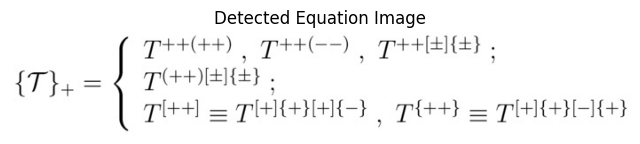

LaTeX code:
\{T\}_{+}=\left\{\begin{array}{l}{{T^{++(++)}\,,\ T^{++(--)}\,,\ T^{++[\pm]\{\pm\}}\,;}}\\ {{T^{(++)[\pm]\{\pm\}}\,;}}\\ {{T^{[++]}\equiv T^{[+]\{\mp]\{\mp\}[+]\{-\}}\,,\ T^{\{++\}}\equiv T^{[+]\{\mp\}\{+\}}}\end{array}\right.

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 7:
--------------------------------------------------


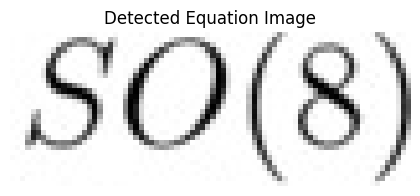

LaTeX code:
S O(8)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 8:
--------------------------------------------------


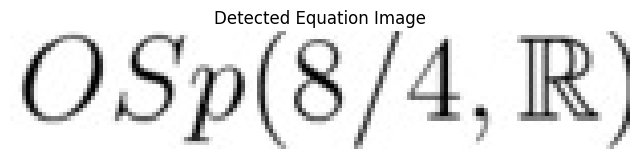

LaTeX code:
O>p(\mathbf{8}/4,\mathbb{R})

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 9:
--------------------------------------------------


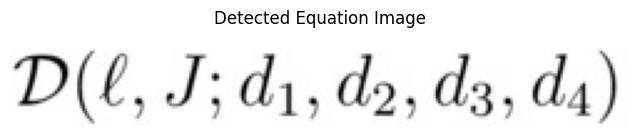

LaTeX code:
D(\ell,J;d_{1},d_{2},d_{3},d_{4})

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 10:
--------------------------------------------------


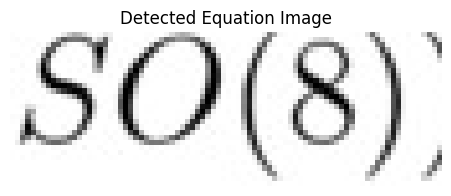

LaTeX code:
S O(8)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 11:
--------------------------------------------------


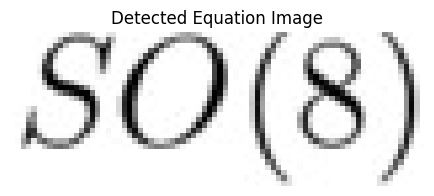

LaTeX code:
S O(8)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 12:
--------------------------------------------------


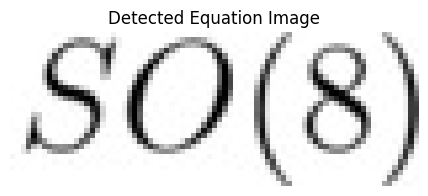

LaTeX code:
S O(8)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 13:
--------------------------------------------------


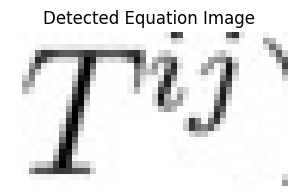

LaTeX code:
T^{i j}{}^{\cdot}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 14:
--------------------------------------------------


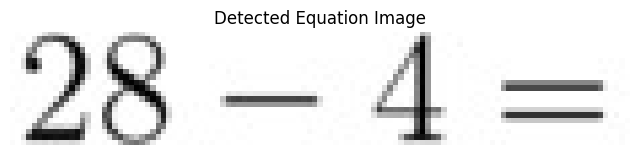

LaTeX code:
28-4=

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 15:
--------------------------------------------------


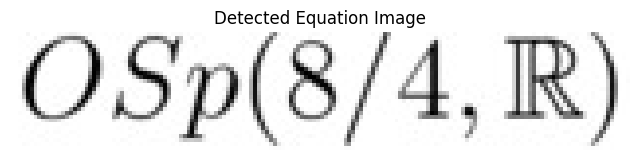

LaTeX code:
O S p(8/4,\mathbb{R})

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 16:
--------------------------------------------------


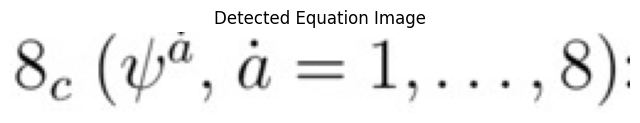

LaTeX code:
{\bf8}_{c}\,(\psi^{\hat{a}},\,\dot{a}=1,\,\cdot\,\cdot\,,\,\m);

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 17:
--------------------------------------------------


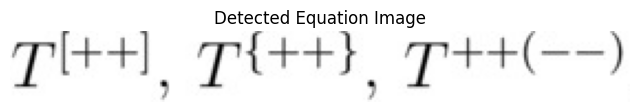

LaTeX code:
T^{[++]}.\ T^{\{++\}}.\ T^{++(--)}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 18:
--------------------------------------------------


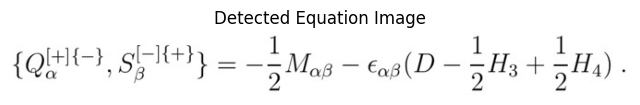

LaTeX code:
\{Q_{\alpha}^{[+]\{-\}},S_{\beta}^{[-]\{+\}}\}=-\frac{1}{2}M_{\alpha\beta}-\epsilon_{\alpha\beta}(D-\frac{1}{2}H_{3}+\frac{1}{2}H_{4})\;.

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 19:
--------------------------------------------------


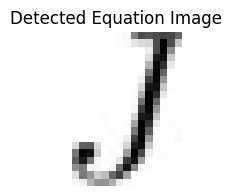

LaTeX code:
\underline{{J}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 20:
--------------------------------------------------


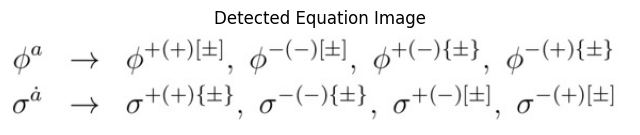

LaTeX code:
\begin{array}{r c l}{{\phi^{a}}}&{{\rightarrow}}&{{\phi^{+(+)[\pm]},~\phi^{-(-)\{\pm\}},~\phi^{+(-)\{\pm\}},~\phi^{-(+\}}}}\\ {{\phi^{a}}}&{{\rightarrow}}&{{\sigma^{+(+)\{\pm\}}.~\sigma^{-(-)\{\pm\}}.~\sigma^{+(-)\{\pm\}}.~\sigma^{-(+)[\pm\}}}}\end{array}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 21:
--------------------------------------------------


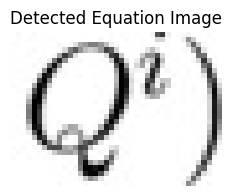

LaTeX code:
Q^{t})

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 22:
--------------------------------------------------


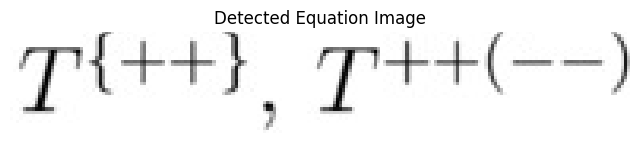

LaTeX code:
T\{++\}_{.}\ I++(-..)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 23:
--------------------------------------------------


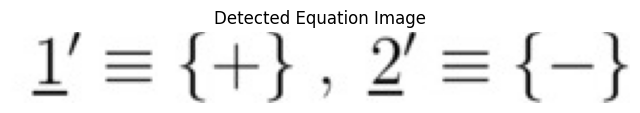

LaTeX code:
\underline{{{1}}}^{\prime}\underline{{{=}}}\ \{+\}~,~\underline{{{2}}}^{\prime}\underline{{{=}}}\ \{-\ \}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 24:
--------------------------------------------------


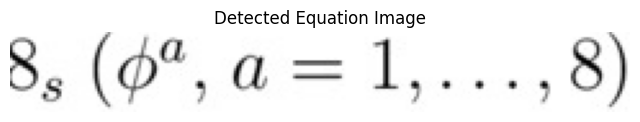

LaTeX code:
\S_{s}\left(\phi^{a},\,a=1,\cdot\cdot,\otimes\right)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 25:
--------------------------------------------------


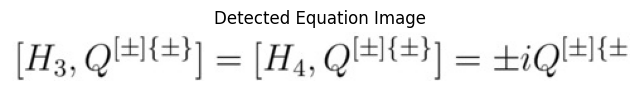

LaTeX code:
[H_{3},{\cal Q}^{\left[\pm\right]\{\pm\}}]=[H_{4},{\cal Q}^{\left[\pm\right]\{\pm\}}]=\pm i{\cal Q}^{\left[\pm\right]\{\pm\}}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 26:
--------------------------------------------------


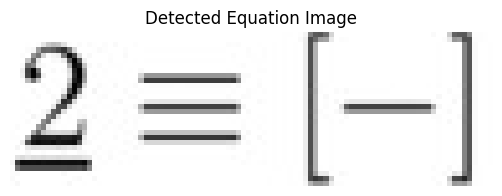

LaTeX code:
2\equiv\left[-\right]

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 27:
--------------------------------------------------


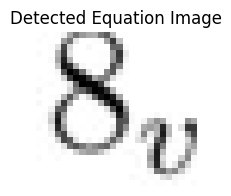

LaTeX code:
\aleph_{v}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 28:
--------------------------------------------------


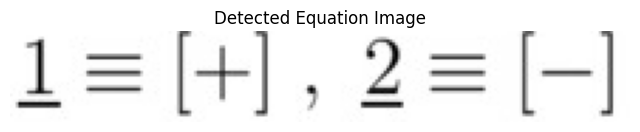

LaTeX code:
\perp\equiv\left[+\right]\,,\;2\equiv\left[-\right]

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 29:
--------------------------------------------------


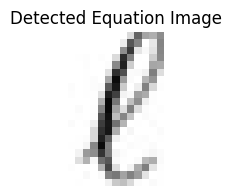

LaTeX code:
\left(\begin{array}{l l}\end{array}\right)

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 30:
--------------------------------------------------


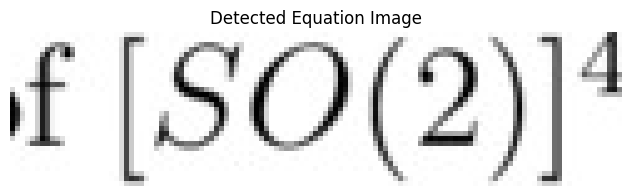

LaTeX code:
\mathrm{f}\left[S O(2)\right]^{4}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 31:
--------------------------------------------------


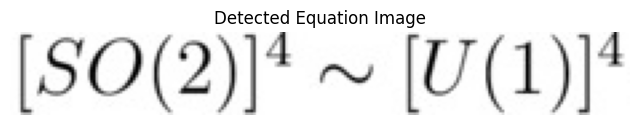

LaTeX code:
\left[S O(2)\right]^{4}\sim[U(1)]^{4}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------

Equation 32:
--------------------------------------------------


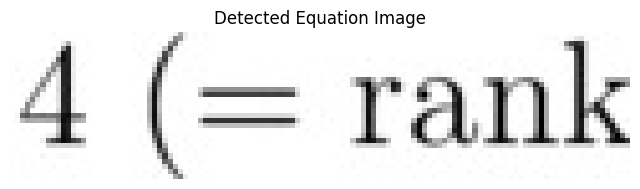

LaTeX code:
4\ (=\ r a n{\kappa}

Rendered equation:


<IPython.core.display.Math object>

--------------------------------------------------


In [ ]:

if __name__ == "__main__":
    image_path = '/content/0003051-page06.jpg'
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # 수식 탐지 및 OCR 수행
    equations, original_image = detect_and_ocr_equations(image_path)

    # 원본 이미지에서의 탐지 결과 시각화
    visualize_original_detections(original_image, equations)

    # 모든 수식의 상세 결과 시각화
    visualize_all_equations(equations, original_image)